# Quick overview 

from  https://www.kaggle.com/c/pkdd-15-predict-taxi-service-trajectory-i/data

# Purpose:
   - Do the quick analysis to get the overview understanding of the data
   - Know the relations of all features, and output the hypothese for further analysis
   - Prepare key parameters for modeling 
   
# Summary    

In [38]:
cd

/Users/GGV


In [39]:
cd Desktop/kaggle_Taxi_Trajectry_Prediction

/Users/GGV/Desktop/kaggle_Taxi_Trajectry_Prediction


In [40]:
import pandas as pd, numpy as np
from mpl_toolkits.basemap import Basemap
%matplotlib inline
%pylab inline
import seaborn 
import json
import folium
from folium import plugins
import zipfile
import matplotlib as mpl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Getting data

In [41]:
df = pd.read_csv('taxi_train.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
TRIP_ID         int64
CALL_TYPE       object
ORIGIN_CALL     float64
ORIGIN_STAND    float64
TAXI_ID         int64
TIMESTAMP       int64
DAY_TYPE        object
MISSING_DATA    bool
POLYLINE        object
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 119.1+ MB


In [43]:
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


## Only keep the rows without missing data 

In [44]:
df = df[df['MISSING_DATA'] == False]

In [45]:
df = df.reset_index()

In [46]:
df.tail()

,index,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
1710655,1710665,1404171463620000698,C,NaN,NaN,20000698,1404171463,A,False,"[[-8.612469,41.14602],[-8.612487,41.145993],[-..."
1710656,1710666,1404171367620000670,C,NaN,NaN,20000670,1404171367,A,False,"[[-8.610138,41.140845],[-8.610174,41.140935],[..."
1710657,1710667,1388745716620000264,C,NaN,NaN,20000264,1388745716,A,False,[]
1710658,1710668,1404141826620000248,B,NaN,12,20000248,1404141826,A,False,"[[-8.630712,41.154885],[-8.63073,41.154813],[-..."
1710659,1710669,1404157147620000079,B,NaN,34,20000079,1404157147,A,False,"[[-8.615538,41.140629],[-8.615421,41.140746],[..."


In [47]:
df.describe()

,index,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA
count,1710660.000000,1.710660e+06,364769.000000,806576.000000,1710660.000000,1.710660e+06,1710660
mean,855335.382609,1.388622e+18,24490.403461,30.272320,20000348.530263,1.388622e+09,0
std,493828.277453,9.180948e+15,19624.301741,17.747814,211.239981,9.180948e+06,0
min,0.000000,1.372637e+18,2001.000000,1.000000,20000001.000000,1.372637e+09,False
25%,427667.750000,1.380731e+18,6593.000000,15.000000,20000166.000000,1.380731e+09,0
50%,855336.500000,1.388493e+18,18755.000000,27.000000,20000345.000000,1.388493e+09,0
75%,1283003.250000,1.396750e+18,40808.000000,49.000000,20000520.000000,1.396750e+09,0
max,1710669.000000,1.404173e+18,63884.000000,63.000000,20000981.000000,1.404173e+09,False


In [48]:
df.groupby('CALL_TYPE').count()['TRIP_ID']

CALL_TYPE
A    364769
B    817878
C    528013
Name: TRIP_ID, dtype: int64

of all 1710670 orders, 47% are type "B" (orders were made on specific stands)
,30% are type "C" (from random street), and 21% are type "A" (dispatched from call center)

In [51]:
df.groupby('DAY_TYPE').count()

,index,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA,POLYLINE
DAY_TYPE,,,,,,,,,
A,1710660,1710660,1710660,364769,806576,1710660,1710660,1710660,1710660


All of the orders are made in normal day, workday or weekend, but not holiday (DAY_TYPE	="A")

In [64]:
len(set(df.TAXI_ID))

448

448 taxi drivers made 1710660 rides in a year 
(from 01/07/2013 to 30/06/2014) 

In [70]:
 df.groupby('TAXI_ID').count().sort('CALL_TYPE')['CALL_TYPE']

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


TAXI_ID
20000970        1
20000940        1
20000931        1
20000264        2
20000911        2
20000980        5
20000170       10
20000941       16
20000981       19
20000969       61
20000079      102
20000585      298
20000248      380
20000312      585
20000609      587
20000185      676
20000510      681
20000579      766
20000449      981
20000902     1068
20000072     1219
20000545     1257
20000535     1290
20000205     1344
20000315     1345
20000071     1362
20000121     1377
20000225     1441
20000407     1459
20000586     1509
            ...  
20000320     6146
20000648     6191
20000199     6193
20000686     6215
20000367     6217
20000171     6264
20000450     6284
20000233     6313
20000140     6313
20000263     6405
20000235     6410
20000179     6430
20000325     6460
20000042     6467
20000304     6505
20000372     6535
20000678     6537
20000616     6924
20000529     6937
20000492     7171
20000424     7176
20000089     7267
20000621     7276
20000307     7498
20

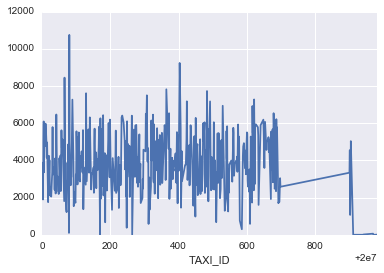

In [68]:
df.groupby('TAXI_ID').count()['TRIP_ID'].plot()

1. Most of the drivers made 1000+ rides in a year(averagely 3000+ rides) only 8 of the drives made less than 100 rides in a year 
2. Every drivers made 10+ rides averagely per day    

In [72]:
# create help function 
def data_pre_process(df):
	df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')
	df['year'] = df['TIMESTAMP'].map(lambda x: x.year)
	df['month'] = df['TIMESTAMP'].map(lambda x: x.month)
	df['day'] = df['TIMESTAMP'].map(lambda x: x.day)
	df['week'] = df['TIMESTAMP'].map(lambda x: x.week)
	df['hour'] = df['TIMESTAMP'].map(lambda x: x.hour)
	df['minute'] = df['TIMESTAMP'].map(lambda x: x.minute)
	df['second'] = df['TIMESTAMP'].map(lambda x: x.second)
	df['POLYLINE'] = df['POLYLINE'].map(json.loads)
	df['POLYLINE'] = df['POLYLINE'].map(np.array)
	df['KNOWN_DURATION'] = df['POLYLINE'].map(len) * 15
	return df

## Extract date and time metrics from the timestamp

In [73]:
df_modified = data_pre_process(df)

In [74]:
df_modified.head()

,index,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,year,month,day,week,hour,minute,second,KNOWN_DURATION
0,0,1372636858620000589,C,NaN,NaN,20000589,2013-07-01 00:00:58,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",2013,7,1,27,0,0,58,345
1,1,1372637303620000596,B,NaN,7,20000596,2013-07-01 00:08:23,A,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",2013,7,1,27,0,8,23,285
2,2,1372636951620000320,C,NaN,NaN,20000320,2013-07-01 00:02:31,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",2013,7,1,27,0,2,31,975
3,3,1372636854620000520,C,NaN,NaN,20000520,2013-07-01 00:00:54,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",2013,7,1,27,0,0,54,645
4,4,1372637091620000337,C,NaN,NaN,20000337,2013-07-01 00:04:51,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",2013,7,1,27,0,4,51,435


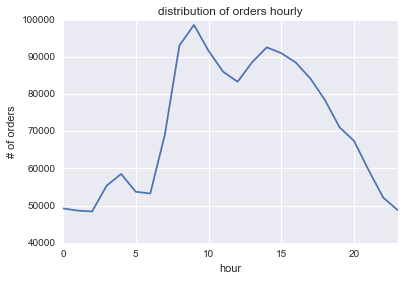

In [79]:
df_modified.groupby('hour').count()['index'].plot(title='distribution of orders hourly')
pyplot.xlabel('hour')
pyplot.ylabel('# of orders')

7 AM ~ 10 AM, and 1 PM are the time that most of taxi drivers are busy, whereas 0 AM~5 AM 
and after 5 PM are Off-season 

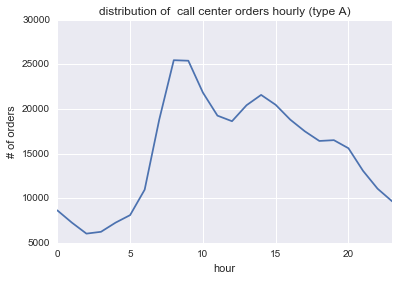

In [89]:
df_modified[df_modified.CALL_TYPE=='A'].groupby('hour').count()['index'].plot(title='distribution of  call center orders hourly (type A)')
pyplot.xlabel('hour')
pyplot.ylabel('# of orders')

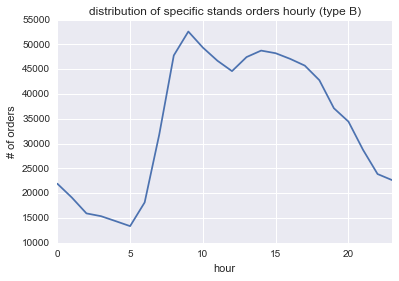

In [90]:
df_modified[df_modified.CALL_TYPE=='B'].groupby('hour').count()['index'].plot(title='distribution of specific stands orders hourly (type B)')
pyplot.xlabel('hour')
pyplot.ylabel('# of orders')

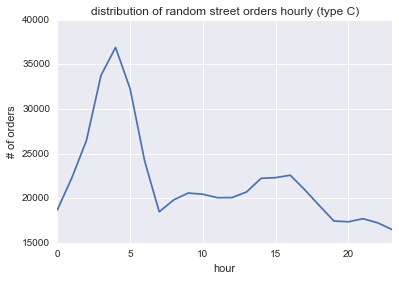

In [91]:
df_modified[df_modified.CALL_TYPE=='C'].groupby('hour').count()['index'].plot(title='distribution of random street orders hourly (type C)')
pyplot.xlabel('hour')
pyplot.ylabel('# of orders')

the peak of "random street orders" is in 4 AM which is different from type A and type B ,
guess because of there are no subway/bus service at that time, so people can only take taxi but have no other choices

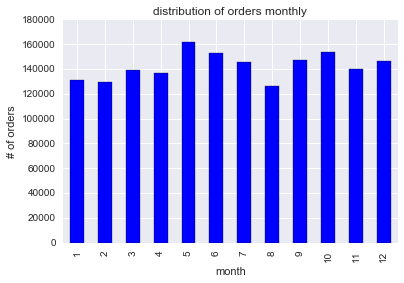

In [84]:
df_modified.groupby('month').count()['index'].plot(kind='bar',title='distribution of orders monthly')
pyplot.xlabel('month')
pyplot.ylabel('# of orders')

amount of orders seem similar in  months